<a href="https://colab.research.google.com/github/kheireldine/Machine-learning-Projects/blob/main/Basic_regression_Predict_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required Libraries

We will install and import the required libraries first. 


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load Data

  Note That and in this case we don't have the cloumns into the dataset, so we have to add them. 
  In addition, We are using pandas to import and read the dataset.
  In the 1st line we are specifing the the url of dataset and we specified the the columns names in the second line because we don't have them in the dataset as we mentioned. 
  Finally, We loaded the data using read_csv function using pandas 

In [88]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,     na_values='?', comment='\t',     sep=' ', skipinitialspace=True)

In [89]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Our data is ready, we loaded the head of data (1st 5 rows) and everything is going well. 
Now we will see the shape of data, see the number of columns and rows. Then we will count the NA values to be removed later

In [90]:
dataset.shape

(398, 8)

In [91]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [92]:
dataset = dataset.dropna()

We have our datatset ready but the origin column is categorical and we have to encode it. 
We have different ways to encode it but here we will map it.

In [93]:
dataset['Origin']

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [94]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [95]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')


In [96]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


# Spliting data into training and test

In [97]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

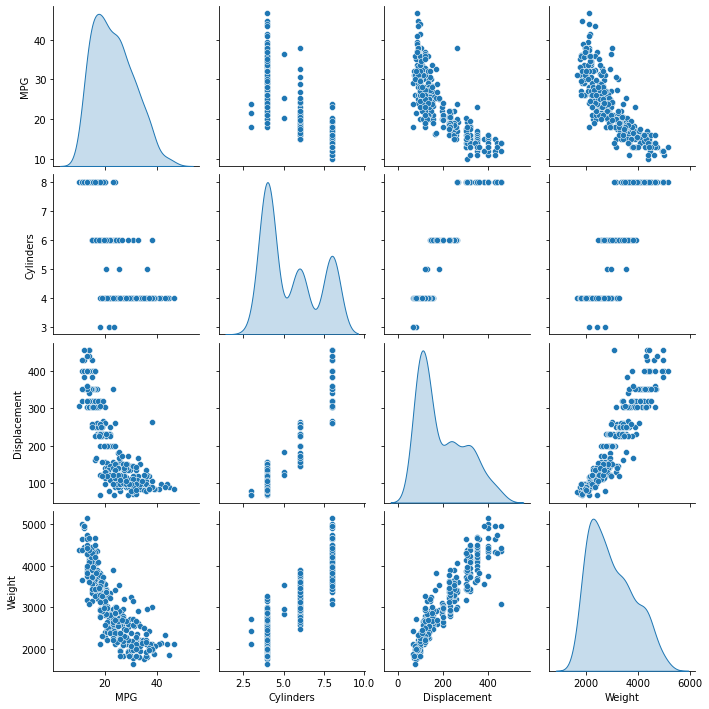

In [98]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

Now we will see the description of data and to make it clearer, we are switching between rows and columns (Transposing)

In [99]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


# Split features from labels 

We are spliting data between train and test and we will specify the lbel column because it is not specified 

In [100]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

# Normalization

We will take a look on the mean and standard deviation of data to be normalized later. 
Note that we use normalizer to scale data. The scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

In [101]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [102]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [103]:
normalizer.adapt(np.array(train_features))

In [104]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [105]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Linear Regression

The first layer we will add to our model is the normalizer layer. 
We will start with a **Single Variable** and it is the HorsePower

In [106]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
horsepower

array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.,  60.,
       180.,  88., 150., 155.,  75., 115., 150.,  90.,  90., 129., 110.,
        90., 110.,  76., 165.,  92.,  88., 100., 150., 122.,  74.,  76.,
        67., 110.,  90.,  65., 150., 150., 220., 165.,  67.,  75., 140.,
        78., 149.,  84., 150., 145., 100.,  75., 170., 200.,  72.,  78.,
        76.,  88., 105.,  53.,  86.,  95.,  75.,  71., 198.,  69., 105.,
       215.,  88.,  87.,  65.,  60.,  68., 129., 145.,  95., 153.,  70.,
       145.,  68.,  70., 100.,  70.,  81.,  95., 225.,  90.,  97., 100.,
        65., 110.,  89., 150., 110.,  95.,  85.,  97.,  60.,  88.,  52.,
        70., 198.,  71.,  90.,  72.,  63., 115.,  90., 135.,  52., 150.,
       170.,  58.,  96., 125.,  92.,  95.,  90.,  95.,  82., 110.,  78.,
        67., 208., 105., 130., 150.,  46.,  90.,  64.,  75.,  85.,  72.,
        95.,  90., 145.,  88., 167., 120., 190.,  78.,  49.,  86., 150.,
        70., 107.,  80., 150., 105., 100., 145.,  8

Text(0.5, 1.0, 'MPG by Horse Power')

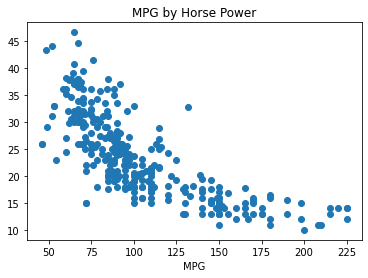

In [107]:

plt.scatter(train_features['Horsepower'],train_labels)
plt.xlabel('HorsePower')
plt.xlabel('MPG')
plt.title("MPG by Horse Power")

The Model will just be based on the HorsePower and as we mentioned and selected before, the label  is MPG. 
To be clearer, we will predict MPG from HorsePower

In [108]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [109]:
horsepower[:1]

array([75.])

In [111]:
horsepower_model.predict(horsepower[:10])

array([[ 0.772],
       [ 0.436],
       [-1.425],
       [ 1.082],
       [ 0.979],
       [ 0.384],
       [ 1.159],
       [ 0.979],
       [ 0.255],
       [ 0.436]], dtype=float32)

In [112]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [113]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.78 s, sys: 138 ms, total: 2.92 s
Wall time: 2.58 s


In [114]:
 horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [115]:
horsepower_model.predict(horsepower[:10])

array([[27.578],
       [25.395],
       [13.3  ],
       [29.594],
       [28.922],
       [25.059],
       [30.098],
       [28.922],
       [24.219],
       [25.395]], dtype=float32)

In [116]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802867,4.193910,95
96,3.802748,4.200472,96
97,3.802940,4.188950,97
98,3.804249,4.186617,98
99,3.803880,4.182844,99


In [117]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

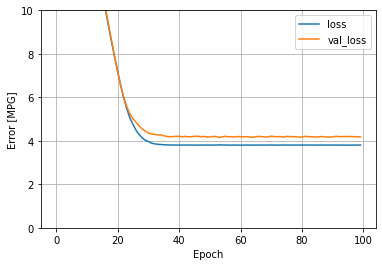

In [118]:
plot_loss(history)

In [119]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [120]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

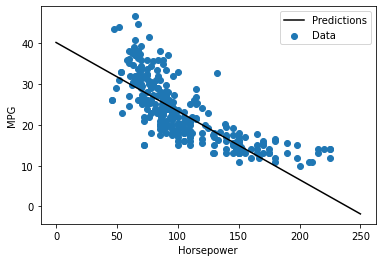

In [121]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
plot_horsepower(x,y)

**Multi- Variable**


In [122]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [123]:
linear_model.predict(train_features[:10])

array([[-0.294],
       [-0.42 ],
       [ 3.724],
       [-1.056],
       [-3.904],
       [ 0.645],
       [-4.223],
       [-2.415],
       [ 0.906],
       [-3.257]], dtype=float32)

In [124]:
linear_model.layers[1].kernel

<tf.Variable 'dense_11/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.184],
       [ 0.557],
       [ 0.045],
       [ 0.623],
       [-0.475],
       [-0.364],
       [-0.129],
       [-0.555],
       [ 0.516]], dtype=float32)>

In [125]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [126]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.87 s, sys: 121 ms, total: 2.99 s
Wall time: 2.72 s


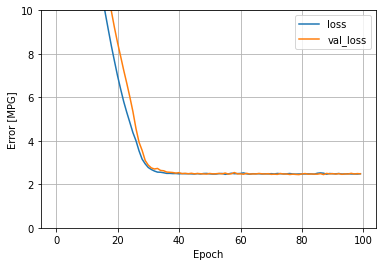

In [127]:
plot_loss(history)

In [128]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

**Regression with a deep neural network (DNN)**

In [129]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [130]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [131]:
dnn_horsepower_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [132]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.37 s, sys: 185 ms, total: 3.55 s
Wall time: 3.1 s


In [133]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.91 s, sys: 175 ms, total: 3.09 s
Wall time: 2.64 s


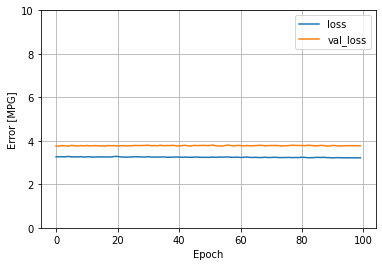

In [134]:
plot_loss(history)

In [135]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

In [ ]:
plot_horsepower(x, y)

In [136]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

**DNN Rgeression multiple input**

In [137]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [138]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.57 s, sys: 203 ms, total: 3.77 s
Wall time: 3.25 s


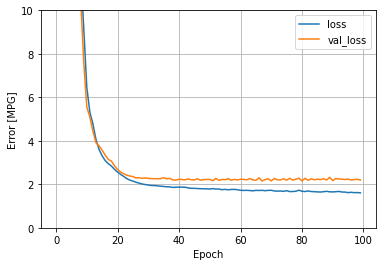

In [139]:
plot_loss(history)

In [140]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.649808
linear_model,2.516696
dnn_horsepower_model,2.886840


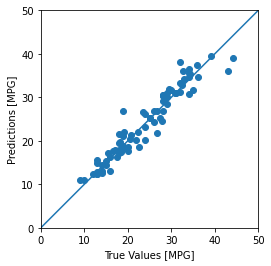

In [141]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

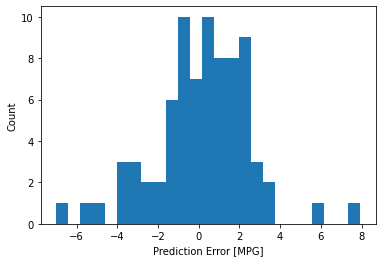

In [142]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [143]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [144]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [145]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.649808
linear_model,2.516696
dnn_horsepower_model,2.886840
reloaded,1.745810
